In [55]:
from nanodrivers.visa_drivers.anapico import ANAPICO
from nanodrivers.visa_drivers.SIM928_voltage_source import SIM # as DC
from nanodrivers.visa_drivers.vna import VNA

#math
import numpy as np
from numpy import *
from scipy.optimize import curve_fit

#plotting
import matplotlib.pyplot as plt
import matplotlib

#matlab import
import scipy.io
from scipy.io import savemat
from scipy.optimize import minimize
from scipy.fft import fft, ifft, fftshift, ifftshift


#file_store
import os

#time
import time
from datetime import datetime, timedelta


from ctypes import *
%matplotlib inline

Global_data_adress = r"C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA"
exp_name = 'TWPA_noise_9\Best_noise_power_sweep_last_plot'
adress = Global_data_adress+'\\'+exp_name
if not os.path.exists(adress):
  os.mkdir(adress)
  print("Folder %s created!" % adress)
else:
  print("Folder %s already exists" % adress)


# Stable temperature since 02.06.2025

Folder C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9\Best_noise_power_sweep_last_plot created!


In [2]:
dc = SIM(slot_num=7)
dc.idn()

Unable to connect device.
 VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.
Check that device is connected, visible in NI MAX and is not used by another software.
Connection exist: Stanford_Research_Systems,SIM928,s/n035459,ver2.7



In [3]:
dc.disconnect()

SIM928 is now disconnected from SIM900 mainframe


In [4]:
dc = SIM(slot_num=7)
dc.idn()

Connection exist: Stanford_Research_Systems,SIM928,s/n035459,ver2.7



In [5]:
vna = VNA()
vna.idn()

Connection exist: Rohde-Schwarz,ZNB20-2Port,1311601062102129,3.45



In [6]:
anapico = ANAPICO()
anapico.idn()

Connection exist: AnaPico AG,APMS20G,3C6-0B4F40003-0985,1.0.7



In [62]:
anapico.set_off(1)

In [63]:
dc.set_volt(0)

In [64]:
dc.set_off()

# Rough gain sweep

In [29]:
from TWPA_scearch_best_gain import *

In [35]:
TWPA = TWPA_best_gain(file_path = adress, file_name = 'Gain_sweep_10mK_test', 
                      vna = vna, anapico = anapico, dc = dc,
                      min_pump_power=-4, max_pump_power=14,
                      min_pump_freq=9e9, max_pump_freq=9.5e9,
                      min_dc=1.5, max_dc=1.65,
                      steps_pump_power=11, steps_pump_freq=201, steps_dc=21,
                      gain_threshold=-10, vna_band_fast=1000,
                      temp=13)

In [36]:
# Upload file if restart needed
# mat = TWPA.load_database(folder_address=adress, 
#                          file_name="Gain_sweep_1000mK.mat", last_one=False)

In [37]:
TWPA.sweep_database(dc_nop=11, pp_nop=5, pf_nop=201, conditional_gain_tr=0, lin = True)

Script started at _2025-08-02 23:17:56


New DC set to 1.5 V at _2025-08-02 23:17:56


New DC set to 1.515 V at _2025-08-02 23:18:02


New DC set to 1.53 V at _2025-08-02 23:18:07


New DC set to 1.545 V at _2025-08-02 23:18:12


KeyboardInterrupt: 

In [40]:
# TWPA.min_dc = 1.38
# TWPA.max_dc = 2.2
# TWPA.min_pump_power=1
# TWPA.max_pump_power=9

In [27]:
TWPA = TWPA_best_gain(file_path = adress, file_name = 'Gain_sweep_10mK_power_freq_0.35_full_range', 
                      vna = vna, anapico = anapico, dc = dc,
                      min_pump_power=-8, max_pump_power=12,
                      min_pump_freq=8e9, max_pump_freq=14.5e9,
                      min_dc=1.38, max_dc=1.62,
                      steps_pump_power=201, steps_pump_freq=501, steps_dc=1,
                      gain_threshold=18,
                      temp=13)

In [28]:
TWPA.sweep_database(dc_nop=1, pp_nop=501, pf_nop=501, conditional_gain_tr=-10, lin = True)

Script started at _2025-08-02 23:16:12


New DC set to 1.38 V at _2025-08-02 23:16:12


KeyboardInterrupt: 

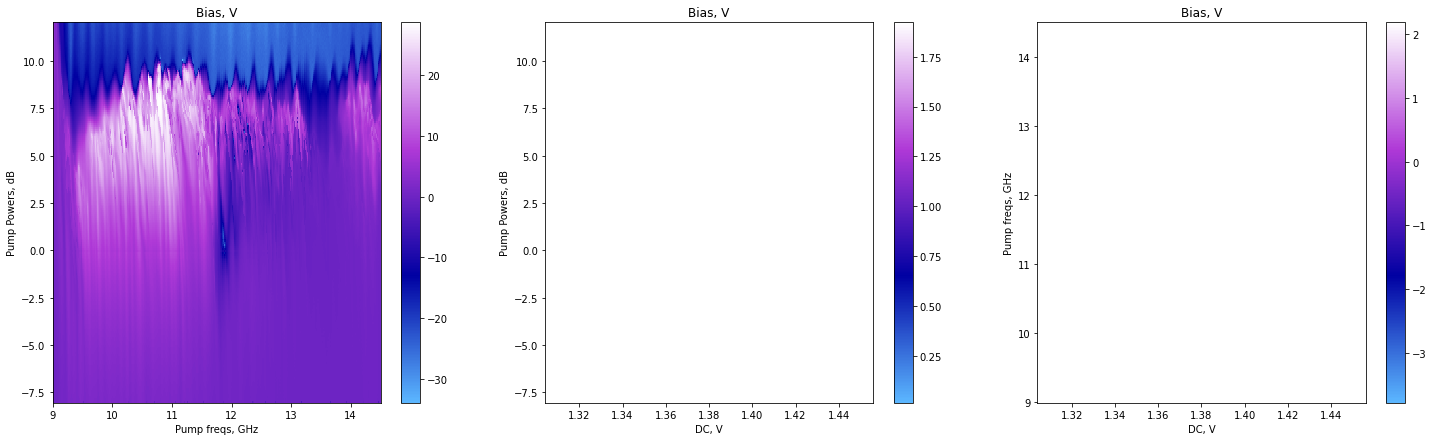

1.38
9.0
-8.0


In [44]:
# plot gain onece finished
%matplotlib inline
index_dc=0
index_pf=0
index_pp=0
TWPA.plot_database(index_dc=index_dc, index_pf=index_pf, index_pp=index_pp)

print(TWPA.database['volts'][index_dc])
print(TWPA.database['pump_freqs'][index_pf]/1e9)
print(TWPA.database['pump_powers'][index_pp])

                        |TWPA GAIN-NOISE sweep has been set |
                        |                                   |
                        v                                   v

In [11]:
np.linspace(-10,14,21)[15]

8.0

In [15]:
TWPA.sweep_noise(gain_tr1=-50, gain_tr2=-50, gain_tr2_max=50, dc_range=[1.35, 2.2, 1], 
            pf_range=[10.77e9,14.5e9,1], 
            pp_range=[-10,14,21], file_name='Noise_sweep_10mK_power_only_low_band_5_avg_50_nop_501')

Script started at 2025-07-27 19:30:56


New DC set to 1.38 V at 2025-07-27 19:30:56
   Noise sweep [(0, 0, 0)] with gain -0.01779 started at 2025-07-27 19:31:02
   Noise sweep [(0, 0, 1)] with gain 1.2518 started at 2025-07-27 22:22:14
   Noise sweep [(0, 0, 2)] with gain 1.66051 started at 2025-07-28 01:13:27
   Noise sweep [(0, 0, 3)] with gain 2.15518 started at 2025-07-28 04:04:40
   Noise sweep [(0, 0, 4)] with gain 2.77251 started at 2025-07-28 06:55:53
   Noise sweep [(0, 0, 5)] with gain 3.45386 started at 2025-07-28 09:47:06
   Noise sweep [(0, 0, 6)] with gain 4.18945 started at 2025-07-28 12:38:18
   Noise sweep [(0, 0, 7)] with gain 5.06156 started at 2025-07-28 15:29:31
   Noise sweep [(0, 0, 8)] with gain 6.78394 started at 2025-07-28 18:20:44
   Noise sweep [(0, 0, 9)] with gain 8.5785 started at 2025-07-28 21:11:57
   Noise sweep [(0, 0, 10)] with gain 12.09859 started at 2025-07-29 00:03:10
   Noise sweep [(0, 0, 11)] with gain 16.72039 started at 2025-07-29 02:54:23
 

In [13]:
TWPA.vna_band_fast=1000
TWPA.vna_nop_fast=10
TWPA.fft_avgs = 50
TWPA.vna_band_slow=5
TWPA.vna_nop_slow=501

In [14]:
TWPA.sweep_noise(gain_tr1=-20, gain_tr2=-20, gain_tr2_max=50, dc_range=[1.6, 2.2, 1], 
            pf_range=[9.27e9,14.5e9,1], 
            pp_range=[-10,14,21], file_name='Noise_sweep_10mK_power_only_high_band_5_avg_50_nop_501')

Script started at 2025-07-25 21:51:23


New DC set to 1.6 V at 2025-07-25 21:51:23
   Noise sweep [(0, 0, 0)] with gain -0.04762 started at 2025-07-25 21:51:28
   Noise sweep [(0, 0, 1)] with gain 2.24771 started at 2025-07-26 00:42:41
   Noise sweep [(0, 0, 2)] with gain 2.91676 started at 2025-07-26 03:33:54
   Noise sweep [(0, 0, 3)] with gain 3.66444 started at 2025-07-26 06:25:07
   Noise sweep [(0, 0, 4)] with gain 4.58898 started at 2025-07-26 09:16:20
   Noise sweep [(0, 0, 5)] with gain 5.65244 started at 2025-07-26 12:07:33
   Noise sweep [(0, 0, 6)] with gain 6.90374 started at 2025-07-26 14:58:46
   Noise sweep [(0, 0, 7)] with gain 8.88906 started at 2025-07-26 17:49:59
   Noise sweep [(0, 0, 8)] with gain 12.45031 started at 2025-07-26 20:41:12
   Noise sweep [(0, 0, 9)] with gain 15.60675 started at 2025-07-26 23:32:25
   Noise sweep [(0, 0, 10)] with gain 19.55783 started at 2025-07-27 02:23:38
   Noise sweep [(0, 0, 11)] with gain 21.40216 started at 2025-07-27 05:14:5

In [14]:
anapico.set_off(1)

In [15]:
dc.set_volt(0)

In [16]:
dc.set_off()

In [40]:
# test best gain point



vna.set_band(1000)
vna.set_nop(1001)
vna.set_lin()
vna.set_freq_start_stop(4e9, 6e9, vna.get_nop())

anapico.set_off(1)

dc.set_volt(0)
vna.set_power(-10)
# time.sleep(60)
mag_ref, pha_ref = vna.get_data()

# VNA power sweep

In [12]:
np.linspace(7,14,10)

array([ 7.        ,  7.77777778,  8.55555556,  9.33333333, 10.11111111,
       10.88888889, 11.66666667, 12.44444444, 13.22222222, 14.        ])

In [59]:
TWPA.vna_band_fast=1000
TWPA.vna_nop_fast=500
TWPA.fft_avgs = 20
TWPA.vna_band_slow = 20
TWPA.vna_nop_slow = 201

TWPA.sweep_noise(gain_tr1=-50, gain_tr2=-50, gain_tr2_max=50, dc_range=[2.374, 2.375, 1], 
            pf_range=[9.205e9, 9.2055e9, 1], 
            pp_range=[-5,14,20], 
            file_name=r'Noise_sweep_20_20_201_{}_{}'.format(2.374, 9.205))
    

Script started at 2025-08-03 21:48:25


New DC set to 2.374 V at 2025-08-03 21:48:25
   Noise sweep [(0, 0, 0)] with gain 3.91203 started at 2025-08-03 21:48:31
   Noise sweep [(0, 0, 1)] with gain 4.82573 started at 2025-08-03 21:55:57
   Noise sweep [(0, 0, 2)] with gain 5.69754 started at 2025-08-03 22:03:23
   Noise sweep [(0, 0, 3)] with gain 6.64303 started at 2025-08-03 22:10:49
   Noise sweep [(0, 0, 4)] with gain 7.54915 started at 2025-08-03 22:18:15
   Noise sweep [(0, 0, 5)] with gain 8.15221 started at 2025-08-03 22:25:41
   Noise sweep [(0, 0, 6)] with gain 8.85619 started at 2025-08-03 22:33:07
   Noise sweep [(0, 0, 7)] with gain 11.86541 started at 2025-08-03 22:40:33
   Noise sweep [(0, 0, 8)] with gain 13.0088 started at 2025-08-03 22:47:59
   Noise sweep [(0, 0, 9)] with gain 13.94607 started at 2025-08-03 22:55:25
   Noise sweep [(0, 0, 10)] with gain 15.92381 started at 2025-08-03 23:02:51
   Noise sweep [(0, 0, 11)] with gain 18.91191 started at 2025-08-03 23:10:

In [60]:
TWPA.vna_band_fast=1000
TWPA.vna_nop_fast=500
TWPA.fft_avgs = 10
TWPA.vna_band_slow = 20
TWPA.vna_nop_slow = 201

TWPA.sweep_noise(gain_tr1=-50, gain_tr2=-50, gain_tr2_max=50, dc_range=[2.372, 2.376, 5], 
            pf_range=[9.205e9, 9.2055e9, 1], 
            pp_range=[-5,14,15], 
            file_name=r'Noise_sweep_good_10_20_201_{}_{}'.format(2.374, 9.205))
    

Script started at 2025-08-04 00:24:35


New DC set to 2.372 V at 2025-08-04 00:24:35
   Noise sweep [(0, 0, 0)] with gain 4.20202 started at 2025-08-04 00:24:42
   Noise sweep [(0, 0, 1)] with gain 5.23418 started at 2025-08-04 00:28:25
   Noise sweep [(0, 0, 2)] with gain 6.30804 started at 2025-08-04 00:32:09
   Noise sweep [(0, 0, 3)] with gain 7.02289 started at 2025-08-04 00:35:53
   Noise sweep [(0, 0, 4)] with gain 8.64769 started at 2025-08-04 00:39:36
   Noise sweep [(0, 0, 5)] with gain 12.65145 started at 2025-08-04 00:43:20
   Noise sweep [(0, 0, 6)] with gain 14.75801 started at 2025-08-04 00:47:03
   Noise sweep [(0, 0, 7)] with gain 19.14303 started at 2025-08-04 00:50:47
   Noise sweep [(0, 0, 8)] with gain 17.27779 started at 2025-08-04 00:54:31
   Noise sweep [(0, 0, 9)] with gain 22.52581 started at 2025-08-04 00:58:14
   Noise sweep [(0, 0, 10)] with gain 21.25658 started at 2025-08-04 01:01:58
   Noise sweep [(0, 0, 11)] with gain 6.36979 started at 2025-08-04 01:0

In [50]:
TWPA.vna_band_fast=1000
TWPA.vna_nop_fast=500
TWPA.fft_avgs = 10
TWPA.vna_band_slow = 200
TWPA.vna_nop_slow = 501

TWPA.sweep_noise(gain_tr1=-50, gain_tr2=-50, gain_tr2_max=50, dc_range=[1.59, 1.61, 4], 
            pf_range=[9.143e9, 9.145e9, 3], 
            pp_range=[0,14,10], 
            file_name=r'Noise_sweep_10_200_501_{}_{}'.format(1.6, 9.144))
    

Script started at 2025-08-03 01:31:59


New DC set to 1.59 V at 2025-08-03 01:31:59
   Noise sweep [(0, 0, 0)] with gain 6.05773 started at 2025-08-03 01:32:06
   Noise sweep [(0, 0, 1)] with gain 7.97576 started at 2025-08-03 01:33:05
   Noise sweep [(0, 0, 2)] with gain 10.42233 started at 2025-08-03 01:34:05
   Noise sweep [(0, 0, 3)] with gain 13.23255 started at 2025-08-03 01:35:05
   Noise sweep [(0, 0, 4)] with gain 16.027 started at 2025-08-03 01:36:05
   Noise sweep [(0, 0, 5)] with gain 18.65216 started at 2025-08-03 01:37:05
   Noise sweep [(0, 0, 6)] with gain 27.1833 started at 2025-08-03 01:38:05
   Noise sweep [(0, 0, 7)] with gain 24.65792 started at 2025-08-03 01:39:05
   Noise sweep [(0, 0, 8)] with gain 12.05191 started at 2025-08-03 01:40:05
   Noise sweep [(0, 0, 9)] with gain 8.33189 started at 2025-08-03 01:41:05
   Noise sweep [(0, 1, 0)] with gain 6.12601 started at 2025-08-03 01:42:05
   Noise sweep [(0, 1, 1)] with gain 8.0865 started at 2025-08-03 01:43:04
 

   Noise sweep [(3, 1, 4)] with gain 24.38246 started at 2025-08-03 03:16:13
   Noise sweep [(3, 1, 5)] with gain 26.69718 started at 2025-08-03 03:17:13
   Noise sweep [(3, 1, 6)] with gain 29.35787 started at 2025-08-03 03:18:13
   Noise sweep [(3, 1, 7)] with gain 25.78724 started at 2025-08-03 03:19:13
   Noise sweep [(3, 1, 8)] with gain 12.29014 started at 2025-08-03 03:20:13
   Noise sweep [(3, 1, 9)] with gain 8.30634 started at 2025-08-03 03:21:13
   Noise sweep [(3, 2, 0)] with gain 8.96308 started at 2025-08-03 03:22:13
   Noise sweep [(3, 2, 1)] with gain 12.24915 started at 2025-08-03 03:23:13
   Noise sweep [(3, 2, 2)] with gain 16.17316 started at 2025-08-03 03:24:12
   Noise sweep [(3, 2, 3)] with gain 21.00893 started at 2025-08-03 03:25:12
   Noise sweep [(3, 2, 4)] with gain 24.35452 started at 2025-08-03 03:26:12
   Noise sweep [(3, 2, 5)] with gain 26.70593 started at 2025-08-03 03:27:12
   Noise sweep [(3, 2, 6)] with gain 29.28331 started at 2025-08-03 03:28:12
 

In [52]:
TWPA.vna_band_fast=1000
TWPA.vna_nop_fast=500
TWPA.fft_avgs = 10
TWPA.vna_band_slow = 200
TWPA.vna_nop_slow = 501

TWPA.sweep_noise(gain_tr1=-50, gain_tr2=-50, gain_tr2_max=50, dc_range=[1.572, 1.577, 4], 
            pf_range=[9.223e9, 9.227e9, 3], 
            pp_range=[0,14,10], 
            file_name=r'Noise_sweep_10_200_501_{}_{}'.format(1.575, 9.225))
    

Script started at 2025-08-03 05:32:27


New DC set to 1.572 V at 2025-08-03 05:32:27
   Noise sweep [(0, 0, 0)] with gain 5.17019 started at 2025-08-03 05:32:34
   Noise sweep [(0, 0, 1)] with gain 9.49727 started at 2025-08-03 05:33:34
   Noise sweep [(0, 0, 2)] with gain 12.53021 started at 2025-08-03 05:34:34
   Noise sweep [(0, 0, 3)] with gain 11.91376 started at 2025-08-03 05:35:34
   Noise sweep [(0, 0, 4)] with gain 5.56859 started at 2025-08-03 05:36:33
   Noise sweep [(0, 0, 5)] with gain 11.73423 started at 2025-08-03 05:37:33
   Noise sweep [(0, 0, 6)] with gain 19.28478 started at 2025-08-03 05:38:33
   Noise sweep [(0, 0, 7)] with gain 2.91219 started at 2025-08-03 05:39:33
   Noise sweep [(0, 0, 8)] with gain -14.5617 started at 2025-08-03 05:40:33
   Noise sweep [(0, 0, 9)] with gain -22.00176 started at 2025-08-03 05:41:33
   Noise sweep [(0, 1, 0)] with gain 6.87791 started at 2025-08-03 05:42:33
   Noise sweep [(0, 1, 1)] with gain 9.75876 started at 2025-08-03 05:43

   Noise sweep [(3, 1, 4)] with gain 8.70912 started at 2025-08-03 07:16:42
   Noise sweep [(3, 1, 5)] with gain 13.19912 started at 2025-08-03 07:17:42
   Noise sweep [(3, 1, 6)] with gain 19.89992 started at 2025-08-03 07:18:42
   Noise sweep [(3, 1, 7)] with gain 2.18997 started at 2025-08-03 07:19:42
   Noise sweep [(3, 1, 8)] with gain -16.30552 started at 2025-08-03 07:20:42
   Noise sweep [(3, 1, 9)] with gain -22.23533 started at 2025-08-03 07:21:42
   Noise sweep [(3, 2, 0)] with gain 9.5914 started at 2025-08-03 07:22:42
   Noise sweep [(3, 2, 1)] with gain 12.76984 started at 2025-08-03 07:23:42
   Noise sweep [(3, 2, 2)] with gain 12.23092 started at 2025-08-03 07:24:41
   Noise sweep [(3, 2, 3)] with gain 6.00847 started at 2025-08-03 07:25:41
   Noise sweep [(3, 2, 4)] with gain 15.93144 started at 2025-08-03 07:26:41
   Noise sweep [(3, 2, 5)] with gain 17.42499 started at 2025-08-03 07:27:41
   Noise sweep [(3, 2, 6)] with gain 19.78022 started at 2025-08-03 07:28:41
  

In [53]:
TWPA.vna_band_fast=1000
TWPA.vna_nop_fast=500
TWPA.fft_avgs = 10
TWPA.vna_band_slow = 200
TWPA.vna_nop_slow = 501

TWPA.sweep_noise(gain_tr1=-50, gain_tr2=-50, gain_tr2_max=50, dc_range=[2.323, 2.327, 4], 
            pf_range=[9.16e9, 9.164e9, 3], 
            pp_range=[0,14,10], 
            file_name=r'Noise_sweep_10_200_501_{}_{}'.format(2.325, 9.162))
    

Script started at 2025-08-03 07:32:39


New DC set to 2.323 V at 2025-08-03 07:32:39
   Noise sweep [(0, 0, 0)] with gain 8.31468 started at 2025-08-03 07:32:46
   Noise sweep [(0, 0, 1)] with gain 13.81948 started at 2025-08-03 07:33:46
   Noise sweep [(0, 0, 2)] with gain 17.31567 started at 2025-08-03 07:34:46
   Noise sweep [(0, 0, 3)] with gain 20.26118 started at 2025-08-03 07:35:46
   Noise sweep [(0, 0, 4)] with gain 17.20415 started at 2025-08-03 07:36:45
   Noise sweep [(0, 0, 5)] with gain 20.78058 started at 2025-08-03 07:37:45
   Noise sweep [(0, 0, 6)] with gain 27.8833 started at 2025-08-03 07:38:45
   Noise sweep [(0, 0, 7)] with gain 18.10315 started at 2025-08-03 07:39:45
   Noise sweep [(0, 0, 8)] with gain 12.96159 started at 2025-08-03 07:40:45
   Noise sweep [(0, 0, 9)] with gain 10.27012 started at 2025-08-03 07:41:45
   Noise sweep [(0, 1, 0)] with gain 10.49213 started at 2025-08-03 07:42:45
   Noise sweep [(0, 1, 1)] with gain 13.98524 started at 2025-08-03 07

   Noise sweep [(3, 1, 4)] with gain 19.90721 started at 2025-08-03 09:16:57
   Noise sweep [(3, 1, 5)] with gain 20.67456 started at 2025-08-03 09:17:56
   Noise sweep [(3, 1, 6)] with gain 20.34624 started at 2025-08-03 09:18:56
   Noise sweep [(3, 1, 7)] with gain 16.01944 started at 2025-08-03 09:19:56
   Noise sweep [(3, 1, 8)] with gain 12.47391 started at 2025-08-03 09:20:56
   Noise sweep [(3, 1, 9)] with gain 9.67687 started at 2025-08-03 09:21:56
   Noise sweep [(3, 2, 0)] with gain 10.21763 started at 2025-08-03 09:22:56
   Noise sweep [(3, 2, 1)] with gain 13.41068 started at 2025-08-03 09:23:56
   Noise sweep [(3, 2, 2)] with gain 17.38487 started at 2025-08-03 09:24:56
   Noise sweep [(3, 2, 3)] with gain 20.71023 started at 2025-08-03 09:25:56
   Noise sweep [(3, 2, 4)] with gain 19.31521 started at 2025-08-03 09:26:56
   Noise sweep [(3, 2, 5)] with gain 21.07199 started at 2025-08-03 09:27:56
   Noise sweep [(3, 2, 6)] with gain 21.04921 started at 2025-08-03 09:28:56


In [54]:
TWPA.vna_band_fast=1000
TWPA.vna_nop_fast=500
TWPA.fft_avgs = 10
TWPA.vna_band_slow = 200
TWPA.vna_nop_slow = 501

TWPA.sweep_noise(gain_tr1=-50, gain_tr2=-50, gain_tr2_max=50, dc_range=[2.373, 2.377, 4], 
            pf_range=[9.205e9, 9.209e9, 3], 
            pp_range=[0,14,10], 
            file_name=r'Noise_sweep_10_200_501_{}_{}'.format(2.375, 9.207))
    

Script started at 2025-08-03 09:32:55


New DC set to 2.373 V at 2025-08-03 09:32:55
   Noise sweep [(0, 0, 0)] with gain 7.05794 started at 2025-08-03 09:33:01
   Noise sweep [(0, 0, 1)] with gain 11.48512 started at 2025-08-03 09:34:01
   Noise sweep [(0, 0, 2)] with gain 13.5966 started at 2025-08-03 09:35:01
   Noise sweep [(0, 0, 3)] with gain 16.24819 started at 2025-08-03 09:36:01
   Noise sweep [(0, 0, 4)] with gain 19.10639 started at 2025-08-03 09:37:01
   Noise sweep [(0, 0, 5)] with gain 18.43913 started at 2025-08-03 09:38:01
   Noise sweep [(0, 0, 6)] with gain 18.54325 started at 2025-08-03 09:39:01
   Noise sweep [(0, 0, 7)] with gain 7.45274 started at 2025-08-03 09:40:01
   Noise sweep [(0, 0, 8)] with gain -3.03002 started at 2025-08-03 09:41:01
   Noise sweep [(0, 0, 9)] with gain -20.07888 started at 2025-08-03 09:42:01
   Noise sweep [(0, 1, 0)] with gain 8.02924 started at 2025-08-03 09:43:01
   Noise sweep [(0, 1, 1)] with gain 11.62481 started at 2025-08-03 09:

KeyboardInterrupt: 

In [12]:
vna_power = np.linspace(-20, -10, 11)
TWPA.vna_band_fast=1000
TWPA.vna_nop_fast=300
TWPA.fft_avgs = 50
TWPA.vna_band_slow= 10
TWPA.vna_nop_slow=501

for i in range(len(vna_power)):
    TWPA.vna_power = vna_power[i]
    TWPA.sweep_noise(gain_tr1=-50, gain_tr2=-50, gain_tr2_max=50, dc_range=[1.38, 2.2, 1], 
                pf_range=[10.77e9,14.5e9,1], 
                pp_range=[7.7,8,1], 
                file_name=r'Noise_sweep_10mK_low_band_5_avg_50_nop_501_vna_power_only_{}'.format(vna_power[i]))
    
    

Script started at 2025-07-31 10:50:28


New DC set to 1.38 V at 2025-07-31 10:50:28
   Noise sweep [(0, 0, 0)] with gain 24.41742 started at 2025-07-31 10:50:35
Run time: 1:25:47.641777
Script started at 2025-07-31 12:16:22


New DC set to 1.38 V at 2025-07-31 12:16:22
   Noise sweep [(0, 0, 0)] with gain 22.47162 started at 2025-07-31 12:16:28
Run time: 1:25:47.558230
Script started at 2025-07-31 13:42:16


New DC set to 1.38 V at 2025-07-31 13:42:16
   Noise sweep [(0, 0, 0)] with gain 23.59274 started at 2025-07-31 13:42:22
Run time: 1:25:47.728196
Script started at 2025-07-31 15:08:10


New DC set to 1.38 V at 2025-07-31 15:08:10
   Noise sweep [(0, 0, 0)] with gain 23.10227 started at 2025-07-31 15:08:16
Run time: 1:25:47.538657
Script started at 2025-07-31 16:34:03


New DC set to 1.38 V at 2025-07-31 16:34:03
   Noise sweep [(0, 0, 0)] with gain 23.69095 started at 2025-07-31 16:34:10
Run time: 1:25:47.596481
Script started at 2025-07-31 17:59:57


New DC set to 1.38 V at 2025-0

KeyboardInterrupt: 

# Gain_stabilty

In [8]:
path = adress +'\\'+ 'Alan_var'
if not os.path.exists(path):
  os.mkdir(path)
  print("Folder %s created!" % path)
else:
  print("Folder %s already exists" % path)

Folder C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9\Alan_var already exists


In [ ]:
dc_9 = 1.6
pp_9 = 7
pf_9 = 9.27e9

dc.set_volt(dc_9)
dc.set_on()
anapico.set_freq(1, pf_9)
anapico.set_power(1, pp_9)

state = dict()
state['pf_9'] = pf_9
state['pp_9'] = pp_9
state['dc_9'] = dc_9
state['T'] = 18
state['band_vna'] = 1
state['nop_vna'] = 100001
state['cw_vna'] = 5e9
state['reps'] = 4

vna.set_band(1)
vna.set_nop(100001)
vna.set_cw_freq(5e9)

reps = 4

mag = np.zeros((reps, vna.get_nop()))
pha = np.zeros((reps, vna.get_nop()))

gain = np.zeros((reps, vna.get_nop()))
delta_pha = np.zeros((reps, vna.get_nop()))


start_time = datetime.now()

#get_reference
anapico.set_off(1)
time.sleep(10)
mag_ref, pha_ref = vna.get_data()
anapico.set_on(1)

state['mag_ref'] = mag_ref
state['pha_ref'] = pha_ref


for i in range(reps):
    print('rep:', i)
    mag_curr, pha_curr = vna.get_data()
    mag[i] = mag_curr
    pha[i] = pha_curr
    
    gain[i] = mag_curr-np.mean(mag_ref)
    delta_pha[i] = pha_curr-np.mean(pha_ref)
    
    state['mag'] = mag
    state['pha'] = pha
    
    state['gain'] = gain
    state['delta_pha'] = delta_pha

    file_name_o = 'Alan_variance_band_1_nop_10001'
    file_name = path + '\\' + file_name_o + start_time.strftime(r'_%Y-%m-%d-%H-%M-%S') + '.mat'
    savemat(file_name, state)
    
anapico.set_off(1)
dc.set_off()

rep: 0
rep: 1
rep: 2


In [18]:
(gain.reshape(1, -1)[0]).shape

(400040,)

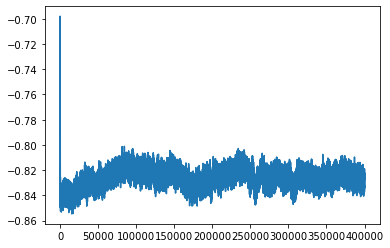

In [23]:
plt.plot(delta_pha.reshape(1, -1)[0, 11:])

In [1]:
font = {'size'   : 15}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(2, 1, figsize = (15, 7), sharex = True)
ax[0].grid()
ax[1].grid()
# ax[0].set_xlabel('Freq, GHz')
ax[0].set_ylabel('Pha, db')
ax[1].set_xlabel('Freq, GHz')
ax[1].set_ylabel('Mag, db')

ax[1].plot(gain.reshape(1, -1)[0, 70:].T, label = 'gain')
ax[0].plot(delta_pha.reshape(1, -1)[0, 70:].T, label = 'pha')

ax[0].legend()
ax[1].legend()

NameError: name 'matplotlib' is not defined

C:\Users\Demag\AppData\Local\Temp\ipykernel_48308\1680224359.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.loglog(freq2, 1/freq2*1500)


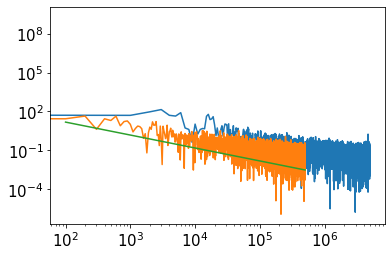

In [139]:
freq = np.linspace(-100e5 / 2, 100e5 / 2, len(gain[0]))
freq2 = np.linspace(-10e5 / 2, 10e5 / 2, len(gain[0]))


plt.loglog(freq, abs(fftshift(fft(np.sqrt(np.power(10, mat['mag'][3] / 10))))) ** 2)
plt.loglog(freq2, abs(fftshift(fft(np.sqrt(np.power(10, mag[3] / 10))))) ** 2)

plt.loglog(freq2, 1/freq2*1500)

In [127]:
mat['mag'].shape

(4, 10001)

In [36]:
import scipy.io
from scipy.io import savemat, loadmat

file = 'Alan_variance_band_1_nop_10001_2025-06-24-17-25-35.mat'
mat = loadmat(path + '\\'+file)
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'pf_9', 'pp_9', 'dc_9', 'T', 'band_vna', 'nop_vna', 'cw_vna', 'reps', 'mag_ref', 'pha_ref', 'mag', 'pha', 'gain', 'delta_pha'])

In [33]:
%pip install allantools

  Using cached allantools-2024.6-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x172eca68f40>
C:\Users\Demag\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Users\Demag\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Users\Demag\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)


In [34]:
import allantools

In [142]:
gg = mat['mag'][0, 70:]
freq = np.logspace(0, 10, len(gg))

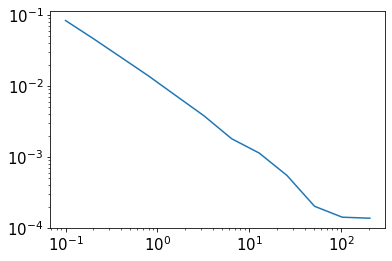

In [144]:
(t2, ad, ade, adn) = allantools.adev(gg, rate=10, data_type="phase", taus='octave')
fig = plt.loglog(t2, ad)

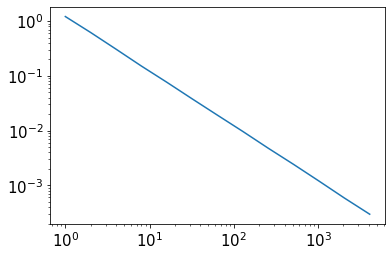

In [112]:
x = allantools.noise.white(10000)        # Generate some phase data, in seconds.
(taus, adevs, errors, ns) = allantools.oadev(x)
fig = plt.loglog(taus, adevs)

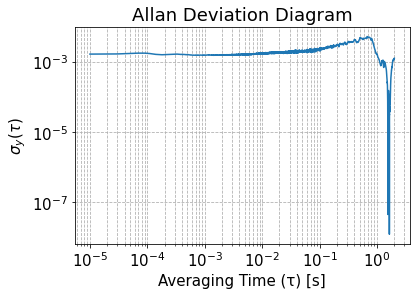

In [93]:
import numpy as np
import matplotlib.pyplot as plt

def allan_deviation(data, dt=1.0, max_cluster=None):
    N = len(data)
    if max_cluster is None:
        max_cluster = N // 2
    
    tau = []
    adev = []
    
    for m in range(1, max_cluster + 1):
        K = N // m
        if K < 2:
            break
        
        # Cluster averages
        y_reshaped = data[:K * m].reshape(K, m)
        y_avg = np.mean(y_reshaped, axis=1)
        
        # Squared differences
        diff = np.diff(y_avg)
        avar = 0.5 * np.mean(diff ** 2)
        
        tau.append(m * dt)
        adev.append(np.sqrt(avar))
    
    return np.array(tau), np.array(adev)

# Example usage:
# Assume `magnitude_data` is your dataset, `dt = 1/f_s`
tau, adev = allan_deviation(gg, dt=1/1e5)

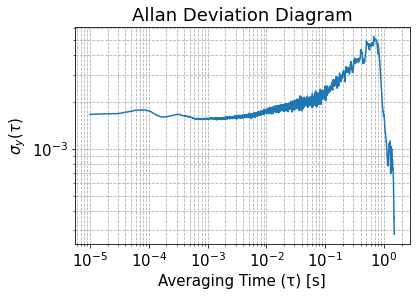

In [99]:
plt.loglog(tau[:-50000], adev[:-50000])
plt.xlabel('Averaging Time (τ) [s]')
plt.ylabel(r'$σ_y(τ)$')
plt.title('Allan Deviation Diagram')
plt.grid(True, which="both", ls="--")
plt.show()